<a href="https://colab.research.google.com/github/PaulD10/Projet-PESSD/blob/main/PESSD_INSEE_PROJET_STAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.6/25.6 MB 24.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 30.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime

# I - Description des données et statistiques descriptives

In [ ]:
#Importation des données de scraping
df_premiere = pd.read_csv("/content/insee_publications_premiere_complete.csv")
df_analyse = pd.read_csv("/content/insee_publications_analyse_complete.csv")
df_analyse.head()

,Year,Category,Title,Abstract,Full_Text,Methodology,Concepts
0,2011,Démographie et création des entreprises,"Les seuils de 10, 20 et 50 salariés : un impac...",Il existe en France de nombreux seuils d'effec...,les effets de seuil sont plus ou moins marqués...,les effets de seuil sont plus ou moins marqués...,NaN
1,2011,Economie générale,Services à domicile : quel effet des incitatio...,"e.Depuis 1991, les ménages ont la possibilité ...",le recours aux services à domicile progresse p...,le recours aux services à domicile progresse p...,NaN
2,2012,Chômage,"Le RMI, puis le RSA découragent-ils certains j...",L'éligibilité au revenu de solidarité active (...,le rmi et le rsa sont deux dispositifs d'aide ...,le rmi et le rsa sont deux dispositifs d'aide ...,NaN
3,2012,Economie générale,Prix du pétrole et crise de la dette : quels e...,vité d'un quart de point de produit intérieur ...,fin les prix du pétrole et de l'ensemble des m...,fin les prix du pétrole et de l'ensemble des m...,"Prix du pétrole et des matières premières, Cri..."
4,2012,Pauvreté - Précarité,"Le RMI, puis le RSA découragent-ils certains j...",L'éligibilité au revenu de solidarité active (...,le rmi et le rsa sont deux dispositifs d'aide ...,le rmi et le rsa sont deux dispositifs d'aide ...,NaN


In [ ]:
df_premiere['Publication'] = 'Premiere'
df_analyse['Publication'] = 'Analyse'
df_combined = pd.concat([df_premiere, df_analyse], ignore_index=True)
df_combined.head(5)

,Year,Category,Title,Abstract,Full_Text,Methodology,Concepts,Publication
0,2010,Agriculture,Les comptes prévisionnels de la branche agricu...,L’année agricole 2010 est marquée par la baiss...,forte remontée des prix des grandes cultures e...,forte remontée des prix des grandes cultures e...,"céréales, oléagineux, protéagineux, betteraves...",Premiere
1,2010,Agriculture,L’agriculture en 2009 en France et en Europe,"En 2009, en France comme dans l’Union européen...",baisse de la valeur de la production agricole ...,baisse de la valeur de la production agricole ...,"production végétale, production animale, résul...",Premiere
2,2010,Caractéristiques des entreprises,Quatre nouvelles catégories d'entreprise,L’entreprise était jusqu'à présent définie sur...,d une définition juridique à une définition éc...,d une définition juridique à une définition éc...,"approximation, profilage, enquête sur les liai...",Premiere
3,2010,Caractéristiques des entreprises,"Depuis trente ans, les grandes entreprises con...",Les salariés du secteur privé travaillent aujo...,en des salariés travaillent dans une entrepris...,en des salariés travaillent dans une entrepris...,NaN,Premiere
4,2010,Chômage,Les conséquences de la crise sur l’emploi dans...,La crise économique a davantage touché les rég...,davantage d emplois perdus dans le nord-est qu...,davantage d emplois perdus dans le nord-est qu...,"économie présentielle, économie présentielle",Premiere


In [ ]:
category_to_theme = {
    'Agriculture': "Secteurs d'activité",
    'Caractéristiques des entreprises': "Entreprises",
    'Chômage': "Marché du travail - Salaires",
    'Commerce': "Secteurs d'activité",
    'Comptes nationaux annuels': "Economie - Conjoncture - Compte nationaux",
    'Consommation et équipement des ménages': "Revenu - Pouvoir d'achat - Consommation",
    'Couple - Familles - Ménages': 'Démographie',
    'Dynamique des territoires': "Territoires, villes et quartiers",
    'Démographie et création des entreprises': "Entreprises",
    'Education - Formation - Compétences': "Conditions de vie - Société",
    'Egalité femmes-hommes': "Conditions de vie - Société",
    'Emploi - Population active': "Marché du travail - Salaires",
    'Entreprises': "Entreprises",
    'Equipements et services à la population': "Territoires, villes et quartiers",
    'Evolution et structure de la population': 'Démographie',
    'Industrie': "Secteurs d'activité",
    'Logement': "Conditions de vie - Société",
    'Mobilités - Déplacements - Frontaliers': "Territoires, villes et quartiers",
    'Mondialisation, compétitivité et innovation': "Entreprises",
    'Patrimoine': "Revenu - Pouvoir d'achat - Consommation",
    'Pauvreté - Précarité': "Revenu - Pouvoir d'achat - Consommation",
    'Revenus - Niveau de vie - Pouvoir d\'achat - Consommation': "Revenu - Pouvoir d'achat - Consommation",
    'Salaires et revenus d\'activité': "Marché du travail - Salaires",
    'Santé - Handicap - Dépendance': "Conditions de vie - Société",
    'Services': "Secteurs d'activité",
    'Société - Vie sociale - Elections': "Conditions de vie - Société",
    'Tourisme': "Secteurs d'activité",
    'Transports': "Secteurs d'activité",
    'Villes et quartiers': "Territoires, villes et quartiers",
    'Economie sociale et solidaire': "Secteurs d'activité",
    'Environnement': "Développement durable - Environnement",
    'Protection sociale - Retraites': "Revenu - Pouvoir d'achat - Consommation",
    'Développement durable': "Développement durable - Environnement",
    'Loisirs - Culture': "Conditions de vie - Société",
    'Sécurité - Justice': "Conditions de vie - Société",
    'Comptes nationaux trimestriels': "Economie - Conjoncture - Compte nationaux",
    'Construction': "Secteurs d'activité",
    'Economie générale': "Economie - Conjoncture - Compte nationaux",
    'Finances publiques': "Economie - Conjoncture - Compte nationaux",
    'Naissances - Fécondité': 'Démographie',
    'Commerce extérieur': "Economie - Conjoncture - Compte nationaux"
}

# Apply the mapping to create the theme column
df_combined['Theme'] = df_combined['Category'].map(category_to_theme)
# Create a new column 'Period' which groups the years into 4-year periods
df_combined['Period'] = (df_combined['Year'] - df_combined['Year'].min()) // 4 * 4 + df_combined['Year'].min()
df_combined.head()

,Year,Category,Title,Abstract,Full_Text,Methodology,Concepts,Publication,Theme,Period
0,2010,Agriculture,Les comptes prévisionnels de la branche agricu...,L’année agricole 2010 est marquée par la baiss...,forte remontée des prix des grandes cultures e...,forte remontée des prix des grandes cultures e...,"céréales, oléagineux, protéagineux, betteraves...",Premiere,Secteurs d'activité,2010
1,2010,Agriculture,L’agriculture en 2009 en France et en Europe,"En 2009, en France comme dans l’Union européen...",baisse de la valeur de la production agricole ...,baisse de la valeur de la production agricole ...,"production végétale, production animale, résul...",Premiere,Secteurs d'activité,2010
2,2010,Caractéristiques des entreprises,Quatre nouvelles catégories d'entreprise,L’entreprise était jusqu'à présent définie sur...,d une définition juridique à une définition éc...,d une définition juridique à une définition éc...,"approximation, profilage, enquête sur les liai...",Premiere,Entreprises,2010
3,2010,Caractéristiques des entreprises,"Depuis trente ans, les grandes entreprises con...",Les salariés du secteur privé travaillent aujo...,en des salariés travaillent dans une entrepris...,en des salariés travaillent dans une entrepris...,NaN,Premiere,Entreprises,2010
4,2010,Chômage,Les conséquences de la crise sur l’emploi dans...,La crise économique a davantage touché les rég...,davantage d emplois perdus dans le nord-est qu...,davantage d emplois perdus dans le nord-est qu...,"économie présentielle, économie présentielle",Premiere,Marché du travail - Salaires,2010


Les articles recouvrant parfois plusieurs thématiques de l'INSEE, les analyses descriptives considérerons un seul article publié sous deux thèmes différents comme deux articles distincts. Une fois les analyses descriptives réalisées, les doublons seront éliminés du corpus.

In [ ]:
# 1. Compter les doublons d'articles
duplicate_counts = df_combined['Full_Text'].value_counts()
num_duplicates = (duplicate_counts > 1).sum()

# 2. Identifier les recoupements entre catégories
cross_category = df_combined.groupby('Full_Text')['Category'].apply(set).reset_index()
cross_category = cross_category[cross_category['Category'].apply(len) > 1]  # Articles ayant plusieurs catégories

# 3. Identifier les articles ayant deux publications différentes
cross_publication = df_combined.groupby('Full_Text')['Publication'].apply(set).reset_index()
cross_publication = cross_publication[cross_publication['Publication'].apply(len) > 1]  # Articles ayant plusieurs publications
num_cross_publication = len(cross_publication)

# 4. Statistiques générales
stats = {
    "Nombre total d'articles dans la base": df_combined.shape[0],
    "Nombre total d'articles uniques": df_combined['Full_Text'].nunique(),
    "Nombre total de catégories": df_combined['Category'].nunique(),
    "Articles ayant plusieurs catégories": len(cross_category),
    "Articles ayant plusieurs publications": num_cross_publication,
}

# 5. Statistiques détaillées par publication
def stats_per_publication(group):
    grouped_category = group.groupby('Full_Text')['Category'].apply(set).reset_index()
    articles_multi_categories = grouped_category[grouped_category['Category'].apply(len) > 1]

    return {
        "Nombre total d'articles uniques": group['Full_Text'].nunique(),
        "Nombre total de catégories": group['Category'].nunique(),
        "Articles ayant plusieurs catégories": len(articles_multi_categories),
        "Moyenne de catégories par article": group.groupby('Full_Text')['Category'].nunique().mean()
    }

# Exclure la colonne "Publication" pour éviter le Warning
stats_by_publication = df_combined.groupby('Publication', group_keys=False).apply(stats_per_publication).to_dict()

# Affichage des résultats
print("Statistiques générales :")
for key, value in stats.items():
    print(f"{key}: {value}")

print("Statistiques par publication :")
for publication, stats in stats_by_publication.items():
    print(f"\n{publication}:")
    for key, value in stats.items():
        print(f"  {key}: {value}")


Statistiques générales :
Nombre total d'articles dans la base: 1060
Nombre total d'articles uniques: 786
Nombre total de catégories: 41
Articles ayant plusieurs catégories: 246
Articles ayant plusieurs publications: 0
Statistiques par publication :

Analyse:
  Nombre total d'articles uniques: 64
  Nombre total de catégories: 17
  Articles ayant plusieurs catégories: 14
  Moyenne de catégories par article: 1.25

Premiere:
  Nombre total d'articles uniques: 722
  Nombre total de catégories: 37
  Articles ayant plusieurs catégories: 232
  Moyenne de catégories par article: 1.353185595567867


<ipython-input-7-3e064756473d>:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stats_by_publication = df_combined.groupby('Publication', group_keys=False).apply(stats_per_publication).to_dict()


In [ ]:
print("\n Distribution des catégories dans l'ensemble des données:")
category_counts = df_combined['Category'].value_counts()
print(category_counts.head(15))

print("\n Distribution des thèmes dans l'ensemble des données:")
category_counts = df_combined['Theme'].value_counts()
print(category_counts.head(15))



 Distribution des catégories dans l'ensemble des données:
Category
Salaires et revenus d'activité                              89
Emploi - Population active                                  85
Caractéristiques des entreprises                            58
Evolution et structure de la population                     55
Mondialisation, compétitivité et innovation                 47
Commerce                                                    42
Revenus - Niveau de vie - Pouvoir d'achat - Consommation    41
Services                                                    40
Egalité femmes-hommes                                       40
Démographie et création des entreprises                     39
Comptes nationaux annuels                                   38
Couple - Familles - Ménages                                 36
Entreprises                                                 36
Industrie                                                   34
Agriculture                                       

In [ ]:
# 3. Identifier les articles multi-catégories
articles_by_category = df_combined.groupby('Full_Text')['Category'].apply(list)
multi_category_articles = articles_by_category[articles_by_category.apply(lambda x: len(set(x)) > 1)]

# 4. Analyser quelles catégories apparaissent le plus souvent ensemble
print("\n Top combinaisons de catégories:")
category_combinations = []
for categories in multi_category_articles:
    unique_cats = sorted(list(set(categories)))
    for i in range(len(unique_cats)):
        for j in range(i+1, len(unique_cats)):
            category_combinations.append((unique_cats[i], unique_cats[j]))

if category_combinations:
    combo_counts = pd.Series(category_combinations).value_counts()
    print(combo_counts.head(10))  # Top 10 des combinaisons

# 5. Catégories les plus concernées par le multi-catégoriel
print("\n Catégories les plus présentes dans des articles multi-catégories:")
multi_cats_flat = [cat for sublist in multi_category_articles for cat in set(sublist)]
multi_cat_counts = pd.Series(multi_cats_flat).value_counts()
print(multi_cat_counts.head(10))


 Top combinaisons de catégories:
(Démographie et création des entreprises, Entreprises)                              36
(Chômage, Emploi - Population active)                                               18
(Pauvreté - Précarité, Revenus - Niveau de vie - Pouvoir d'achat - Consommation)    15
(Caractéristiques des entreprises, Mondialisation, compétitivité et innovation)     11
(Egalité femmes-hommes, Emploi - Population active)                                  9
(Couple - Familles - Ménages, Egalité femmes-hommes)                                 6
(Caractéristiques des entreprises, Industrie)                                        6
(Couple - Familles - Ménages, Evolution et structure de la population)               6
(Caractéristiques des entreprises, Démographie et création des entreprises)          5
(Egalité femmes-hommes, Salaires et revenus d'activité)                              5
Name: count, dtype: int64

 Catégories les plus présentes dans des articles multi-catégories:
Em

In [ ]:
# 6. Pourcentage d'articles multi-catégories par catégorie
print("\n Pourcentage d'articles multi-catégories par catégorie:")
total_by_category = df_combined['Category'].value_counts()
multi_cat_percentage = pd.DataFrame({
    'Total': total_by_category,
    'Multi': multi_cat_counts
}).fillna(0)
multi_cat_percentage['Pourcentage'] = (multi_cat_percentage['Multi'] / multi_cat_percentage['Total'] * 100).round(2)
print(multi_cat_percentage.sort_values('Pourcentage', ascending=False).head(20))


 Pourcentage d'articles multi-catégories par catégorie:
                                                    Total  Multi  Pourcentage
Commerce extérieur                                      1    1.0       100.00
Comptes nationaux trimestriels                          2    2.0       100.00
Entreprises                                            36   36.0       100.00
Démographie et création des entreprises                39   38.0        97.44
Chômage                                                25   22.0        88.00
Santé - Handicap - Dépendance                           9    7.0        77.78
Egalité femmes-hommes                                  40   31.0        77.50
Développement durable                                   4    3.0        75.00
Sécurité - Justice                                      4    3.0        75.00
Dynamique des territoires                              22   16.0        72.73
Loisirs - Culture                                       7    5.0        71.43
Environ

In [ ]:
print("\n🔹 Distribution temporelle des catégories:")
# Compter par année
print("\nNombre d'articles par année:")
year_counts = df_combined.groupby('Year').size()
print(year_counts)

# Top catégories par année
print("\nTop catégories par année:")
for year in sorted(df_combined['Year'].unique()):
    year_data = df_combined[df_combined['Year'] == year]
    top_cats = year_data['Category'].value_counts().head(5)
    print(f"\nAnnée {year}:")
    print(top_cats)



🔹 Distribution temporelle des catégories:

Nombre d'articles par année:
Year
2010    66
2011    70
2012    59
2013    72
2014    61
2015    62
2016    57
2017    62
2018    55
2019    91
2020    64
2021    77
2022    77
2023    83
2024    83
2025    21
dtype: int64

Top catégories par année:

Année 2010:
Category
Emploi - Population active                 8
Salaires et revenus d'activité             6
Evolution et structure de la population    6
Services                                   5
Commerce                                   4
Name: count, dtype: int64

Année 2011:
Category
Commerce                                   4
Emploi - Population active                 4
Evolution et structure de la population    4
Pauvreté - Précarité                       4
Salaires et revenus d'activité             4
Name: count, dtype: int64

Année 2012:
Category
Salaires et revenus d'activité             7
Société - Vie sociale - Elections          4
Caractéristiques des entreprises           3
Chô

<Figure size 1200x800 with 0 Axes>

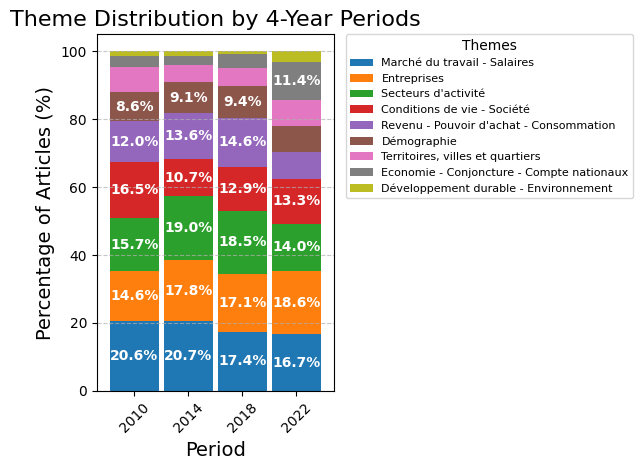

In [ ]:
# Create a crosstab to get the count of themes per period
theme_counts = pd.crosstab(df_combined['Period'], df_combined['Theme'])

# Normalize to get percentages
theme_percentages = theme_counts.div(theme_counts.sum(axis=1), axis=0) * 100

# Sort themes by overall frequency
theme_order = theme_counts.sum().sort_values(ascending=False).index

# Set up the figure with a reasonable size
plt.figure(figsize=(12, 8))

# Create a stacked bar chart
ax = theme_percentages[theme_order].plot(kind='bar', stacked=True, width=.9)

# Improve the appearance
plt.title('Theme Distribution by 4-Year Periods', fontsize=16)
plt.xlabel('Period', fontsize=14)
plt.ylabel('Percentage of Articles (%)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Handle the legend effectively
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, title='Themes',
          bbox_to_anchor=(1.05, 1),
          loc='upper left',
          borderaxespad=0.,
          fontsize=8)

# Add percentage labels for themes that take up significant space
for i, bar in enumerate(ax.patches):
    if bar.get_height() > 8:  # Only show labels for themes that take up more than 8% of articles
        ax.text(bar.get_x() + bar.get_width()/2,
                bar.get_y() + bar.get_height()/2,
                f'{bar.get_height():.1f}%',
                ha='center', va='center',
                color='white', fontweight='bold')

plt.tight_layout()
#plt.savefig('theme_distribution_by_period.png', dpi=300, bbox_inches='tight')
plt.show()


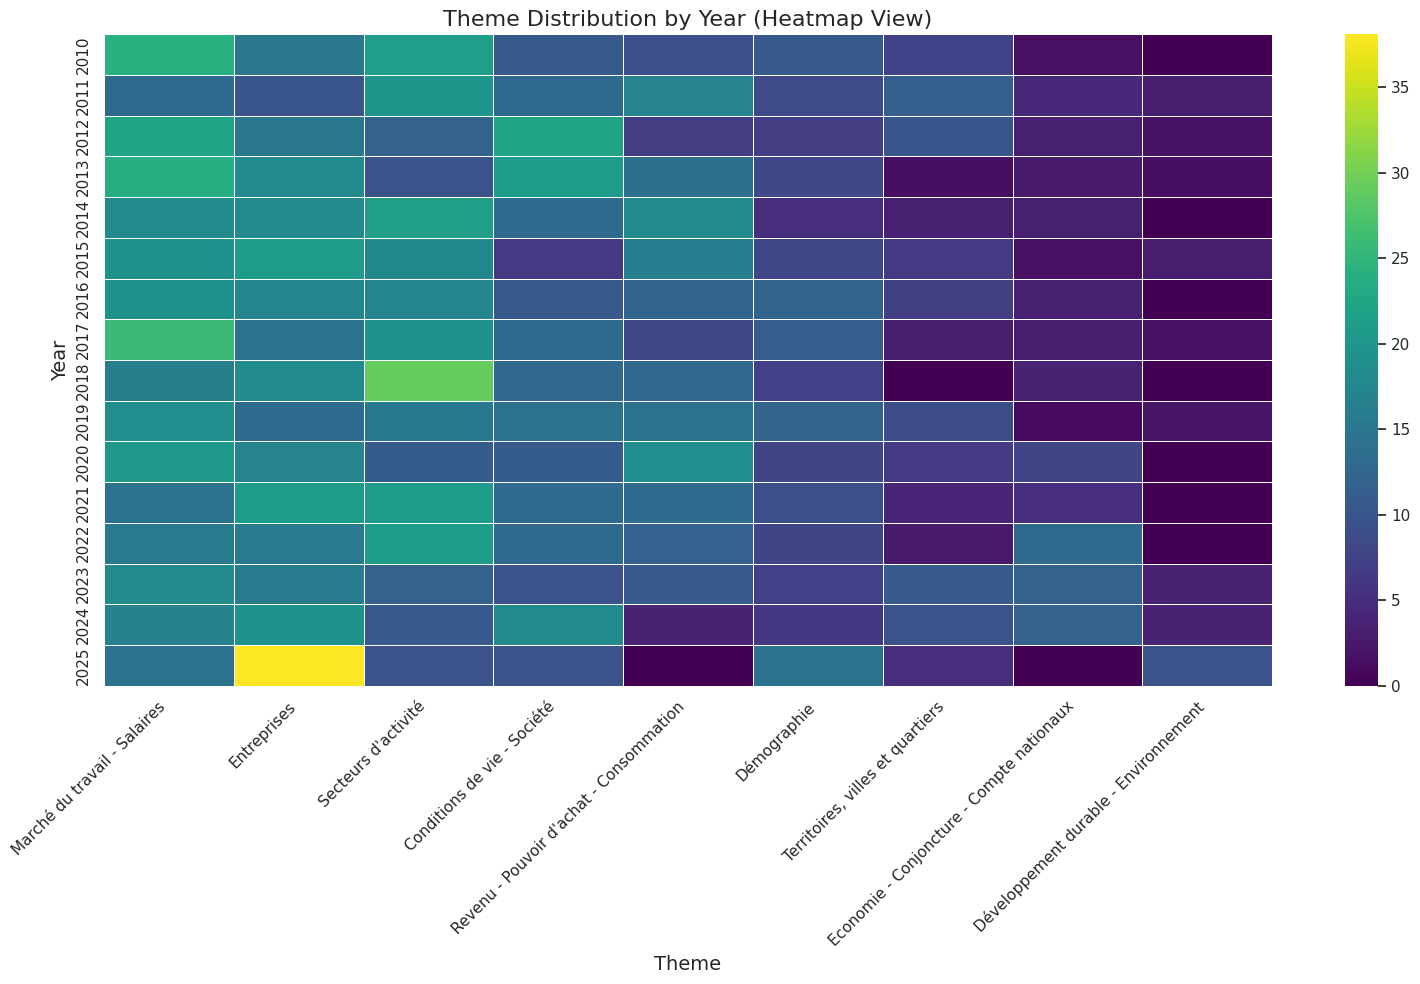

In [ ]:
# Alternative visualization: heatmap for better readability with many themes
plt.figure(figsize=(16, 10))
sns.heatmap(theme_percentages[theme_order],
            cmap='viridis',
            annot=False,  # Set to True if you want to show values
            fmt='.1f',
            linewidths=.5)

plt.title('Theme Distribution by Year (Heatmap View)', fontsize=16)
plt.xlabel('Theme', fontsize=14)
plt.ylabel('Year', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('theme_distribution_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

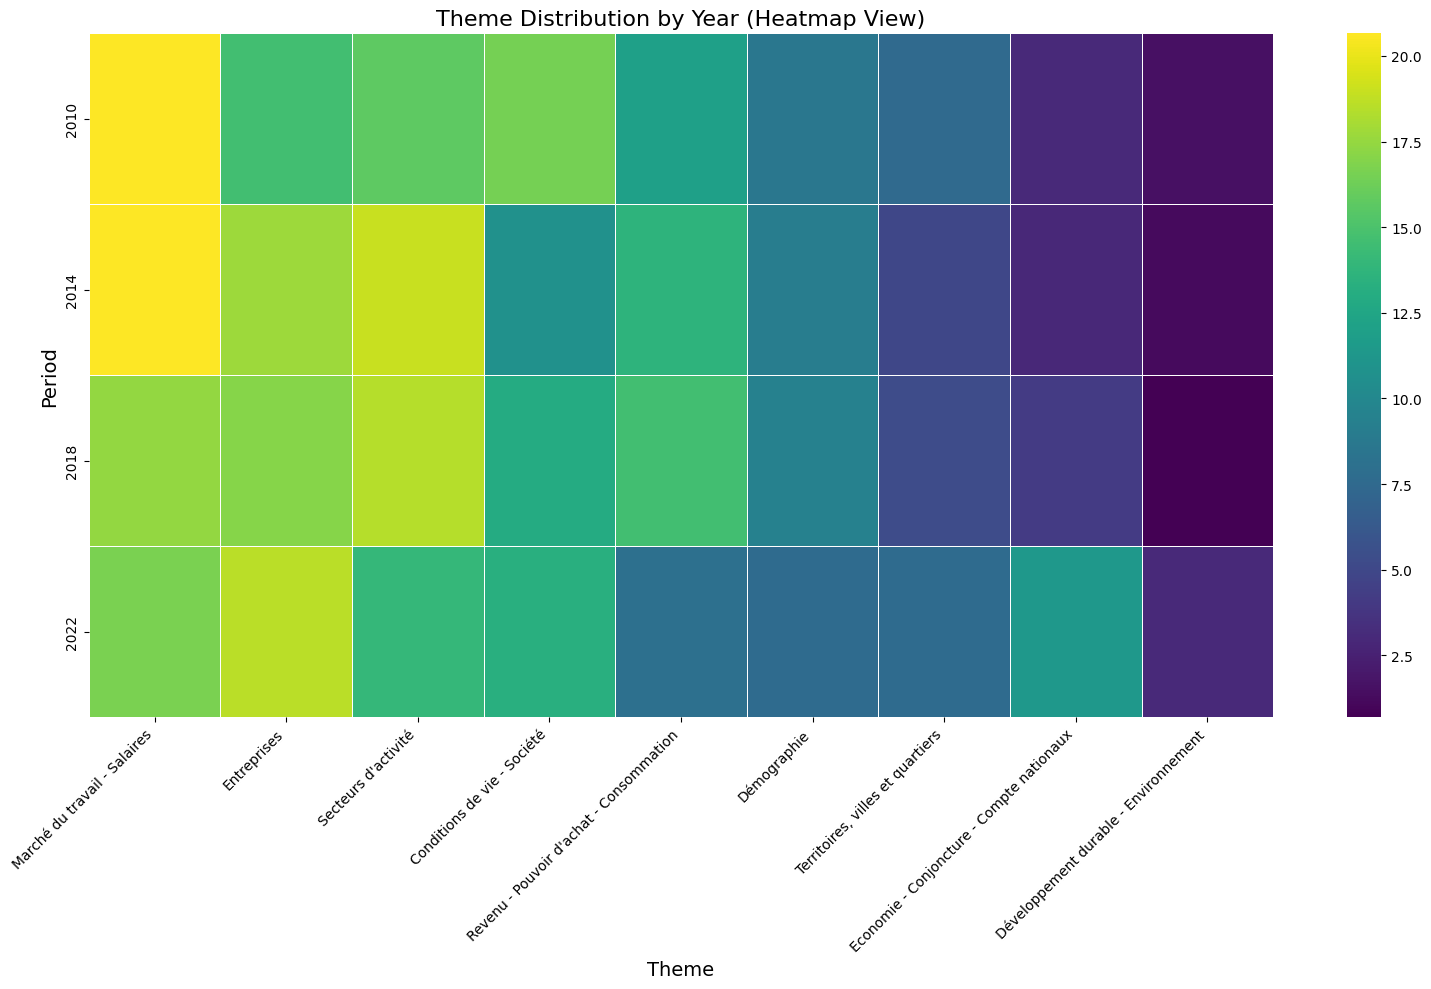

In [ ]:
# Alternative visualization: heatmap for better readability with many themes
plt.figure(figsize=(16, 10))
sns.heatmap(theme_percentages[theme_order],
            cmap='viridis',
            annot=False,  # Set to True if you want to show values
            fmt='.1f',
            linewidths=.5)

plt.title('Theme Distribution by Year (Heatmap View)', fontsize=16)
plt.xlabel('Theme', fontsize=14)
plt.ylabel('Period', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig('theme_distribution_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

## La structure globale des publications d'INSEE Analyse et INSEE Première a peu évolué même si elle tend lentement à devenir de plus en plus généraliste.


# Embedding et carte des mots employés

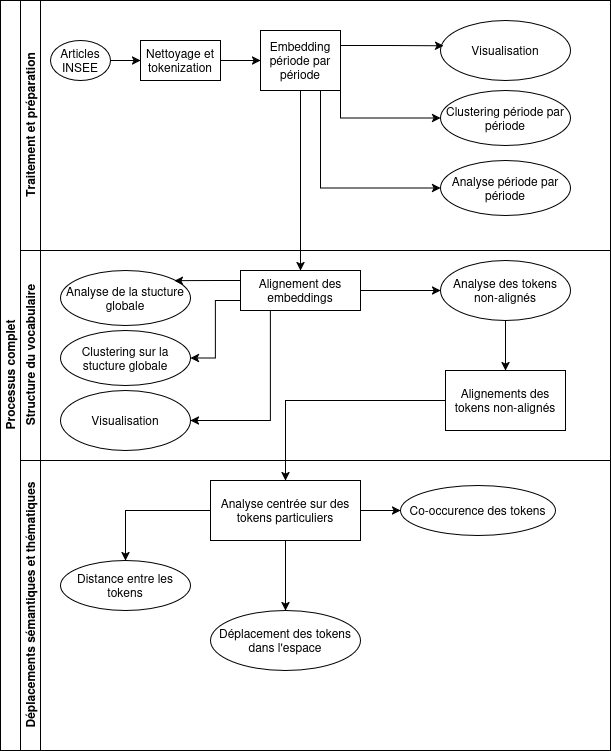

In [10]:
!pip install numpy scipy gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 62.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 22.0 MB/s eta 0:00:00


In [11]:
#Libraries for preprocessing
import yaml
import re
import numpy as np
import spacy
import gensim
from gensim.models import Word2Vec


import sklearn.metrics.pairwise as smp
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from collections import defaultdict
import scipy.spatial.distance as distance
import scipy.stats as stats

RecursionError: maximum recursion depth exceeded while getting the repr of an object

In [17]:
config_yaml = """
namethetest: 'TESTEMBEDDING'

# ------------------- General input variables --------------------

inputs:
  directory: '/content'

# ------------------- Preprocessing settings --------------------

preprocessing:
  skip: False
  savepreprocessed: True
  pipelines:
    minwordlength: 2
    lowercase: True
    remove_punctuation: True
    remove_stopwords: True


# ------------------- Training settings --------------------

training:
  skip: False
  options:
    epochs: 5
    vector_size: 300
    sg: True
    min_count: 2
    window: 10
    start_alpha: 0.025
    end_alpha: 0.025
    workers: 4

# ------------------- Alignment settings --------------------
alignment:
  skip: False"""

config = yaml.safe_load(config_yaml)

NameError: name 'content' is not defined

In [18]:
# Load French language model
nlp = spacy.load('fr_core_news_lg')

## Text Preprocessing

def cleantxt(text, remove_punctuation=True, lowercase=True):
    """
    Cleans and preprocesses text data.
    """
    text = re.sub(r'-\n', '', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    if remove_punctuation:
        text = re.sub(r'[^a-zA-ZÀ-ÖØ-öø-ÿ0-9\s]', ' ', text)
    if lowercase:
        text = text.lower()
    doc = nlp(text)
    return ' '.join([token.lemma_ for token in doc if not token.is_stop])

def stopwdsrm(text, stoplist, minwordlength):
    """
    Stopword removal function

    Args:
        text (str): The text to be preprocessed.
        stoplist (list): List of stopwords.
        minwordlength (int or float): min number of characters for a word to be kept. Use 1 to keep words of any length.

    Returns:
        str: Texts without stopwords.
    """
    newtext = ' '.join([word for word in text.split() if word not in stoplist and len(word) >= minwordlength])
    return newtext


OSError: [E050] Can't find model 'fr_core_news_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
# ------------------- intersection_align_gensim --------------------
# from: https://gist.github.com/quadrismegistus/09a93e219a6ffc4f216fb85235535faf
def intersection_align_gensim(m1, m2, words=None):
      """
    Intersect two gensim word2vec models, m1 and m2.
    Only the shared vocabulary between them is kept.
    If 'words' is set (as list or set), then the vocabulary is intersected with this list as well.
    Indices are re-organized from 0..N in order of descending frequency (=sum of counts from both m1 and m2).
    These indices correspond to the new syn0 and syn0norm objects in both gensim models:
        -- so that Row 0 of m1.syn0 will be for the same word as Row 0 of m2.syn0
        -- you can find the index of any word on the .index2word list: model.index2word.index(word) => 2
    The .vocab dictionary is also updated for each model, preserving the count but updating the index.
    """

    # Get the vocab for each model
    vocab_m1 = set(m1.wv.index_to_key)
    vocab_m2 = set(m2.wv.index_to_key)

    # Find the common vocabulary
    common_vocab = vocab_m1 & vocab_m2
    if words: common_vocab &= set(words)

    # If no alignment necessary because vocab is identical...
    if not vocab_m1 - common_vocab and not vocab_m2 - common_vocab:
        return (m1,m2)

    # Otherwise sort by frequency (summed for both)
    common_vocab = list(common_vocab)
    common_vocab.sort(key=lambda w: m1.wv.get_vecattr(w, "count") + m2.wv.get_vecattr(w, "count"), reverse=True)
    # print(len(common_vocab))

    # Then for each model...
    for m in [m1, m2]:
        # Replace old syn0norm array with new one (with common vocab)
        indices = [m.wv.key_to_index[w] for w in common_vocab]
        old_arr = m.wv.vectors
        new_arr = np.array([old_arr[index] for index in indices])
        m.wv.vectors = new_arr

        # Replace old vocab dictionary with new one (with common vocab)
        # and old index2word with new one
        new_key_to_index = {}
        new_index_to_key = []
        for new_index, key in enumerate(common_vocab):
            new_key_to_index[key] = new_index
            new_index_to_key.append(key)
        m.wv.key_to_index = new_key_to_index
        m.wv.index_to_key = new_index_to_key

        print(len(m.wv.key_to_index), len(m.wv.vectors))

    return (m1,m2)


In [ ]:
# ------------------- Import configs --------------------
configs = config

# --- Relevant vars
## -- General
namethetest = configs['namethetest']
inputfiles = configs['inputs']['directory']
skip_preprocessing = configs['preprocessing']['skip']
skip_training = configs['training']['skip']
skip_alignment = configs['alignment']['skip']

## -- Preprocessing
savepreprocessed = configs['preprocessing']['savepreprocessed']
minwordlength = configs['preprocessing']['pipelines']['minwordlength']
lowercase = configs['preprocessing']['pipelines']['lowercase']
remove_punctuation = configs['preprocessing']['pipelines']['remove_punctuation']
remove_stopwords = configs['preprocessing']['pipelines']['remove_stopwords']

## -- Training
epochs = configs['training']['options']['epochs']
vector_size = configs['training']['options']['vector_size']
sg = configs['training']['options']['sg']
min_count = configs['training']['options']['min_count']
window = configs['training']['options']['window']
start_alpha = configs['training']['options']['start_alpha']
end_alpha = configs['training']['options']['end_alpha']
workers = configs['training']['options']['workers']


In [ ]:
# ------------------- Create dirs if needed --------------------

# --- General outputs directory
if not os.path.exists('./outputs'):
	os.mkdir('./outputs')

# --- Dir for these specific models
if not os.path.exists('./outputs/{}'.format(namethetest)):
	os.mkdir('./outputs/{}'.format(namethetest))

# --- Place non-aligned embeddings in a dedicated dir
if not os.path.exists('./outputs/{}/raw'.format(namethetest)):
	os.mkdir('./outputs/{}/raw'.format(namethetest))

# --- Place aligned embeddings in a dedicated dir
if not os.path.exists('./outputs/{}/aligned'.format(namethetest)):
	os.mkdir('./outputs/{}/aligned'.format(namethetest))

# --- Save preprocessed texts in a dedicated dir
if savepreprocessed == True:
    if not os.path.exists('./outputs/{}/preprocessed_corpus'.format(namethetest)):
        os.mkdir('./outputs/{}/preprocessed_corpus'.format(namethetest))



In [ ]:
def tokenize_french(text):
    return word_tokenize(text, language="french")

# ------------------- Preprocessing & training --------------------

# --- List the paths for all the texts inside the input dir
alltexts = glob(f'{inputfiles}/*txt')

# --- Define stopwords
cachedStopWords = stopwords.words("french")
cachedStopWords.extend(["insee", "source","méthode","consulter","figure", "être", "avoir", "ainsi", "dont", "etc"])
cachedStopWords = list(dict.fromkeys(cachedStopWords))

for subcorpus in alltexts:
    # --- Start timing for the specific time slice
    startslice = timeit.default_timer()

    # --- Get name of the time slice (i.e. the last bit of the file path without the ext)
    nameoftimeslice = subcorpus.split('/')[-1].split('.')[0]

    print(f'Now preprocessing {nameoftimeslice}...')

    # --- Open new file in w mode if option to save the preprocessed text is chosen
    if savepreprocessed == True:
        newfile = open(f'./outputs/{namethetest}/preprocessed_corpus/{nameoftimeslice}.txt', 'w', encoding="utf-8")


    # --- Start list of sentences (i.e. articles, text chunks, etc., depending on input), this will be input of w2v
    sentences = []

    with open(subcorpus, "r", encoding="utf-8") as infile:
        # --- Read line by line and preprocess
        for line in tqdm(infile):
            ## -- Preprocess the texts according to configs
            text = cleantxt(line, remove_punctuation, lowercase)
            ## -- Remove stopwords if chosen to
            if remove_stopwords == True:
                text = stopwdsrm(text, cachedStopWords, minwordlength) # Remove stopwords
            ## -- Write the line to the newfile if chosen to (without tokenizing)
            if savepreprocessed == True:
                if text != ' ' and text != '' and text != '\n':
                    newfile.write(text + '\n')
            ## -- Tokenize if what's left after preprocessing is not just whitespace
            if skip_training == False:
                if text != ' ' and text != '' and text != '\n':
                    text = tokenize_french(text)
                    sentences.append(text)

    print('All preprocessing finished. Altogether it took {} minutes.'.format((timeit.default_timer() - startslice) / 60))

    if skip_training == False:
        # --- Initialize w2v model with selected parameters
        w2v_model = Word2Vec(min_count=min_count,
                            window=window,
                            sg=sg,
                            vector_size=vector_size,
                            workers=workers)

        # --- Build vocabulary from the sentences based on the initialized model
        print('Building the vocab...')
        w2v_model.build_vocab(sentences)
        print('Vocab built!')

        # --- Start the training
        print('Now training the {}s model... This might take a very long time. Have a coffee. Or two.'.format(nameoftimeslice))

        # --- Start timing for training process
        traintime = timeit.default_timer()

        w2v_model.train(sentences,
                        total_examples=w2v_model.corpus_count,
                        start_alpha=start_alpha,
                        end_alpha=end_alpha,
                        epochs=epochs)

        # --- Save model
        w2v_model.save("./outputs/{}/raw/{}.model".format(namethetest,nameoftimeslice))

        stopslice = timeit.default_timer()
        print('{} done! It took {} minutes'.format(nameoftimeslice, (stopslice - startslice)/60))

# ------------------- Alignment --------------------

if skip_alignment == False:
    print('Now starting alignement with Orthogonal Procrustes...')
    # --- Start timing alignment process
    startalign = timeit.default_timer()

    # --- List all raw models and order them by name
    allmodels = sorted(glob('./outputs/{}/raw/*model'.format(namethetest)))

    # --- Load last model (fixed time slice)
    model1 = Word2Vec.load(allmodels[-1])

    # --- Just get the model name and make a copy in the aligned folder
    model1_name = allmodels[-1].split('/')[-1]
    model1.save('./outputs/{}/aligned/{}'.format(namethetest,model1_name))

    # --- Aligned each of the models to the model for the last time slice
    for model in allmodels[:-1]:

        model2_name = model.split('/')[-1]
        print('Now aligning {} to {}...'.format(model1_name,model2_name))

        ## -- Load model
        model2 = Word2Vec.load(model)

        ## -- Temp create a third model and save it in the aligned folder
        model3 = smart_procrustes_align_gensim(model1,model2)

        model3.save('./outputs/{}/aligned/{}'.format(namethetest,model2_name))

    print('Alignment complete!')
    print('Time to finish alignment: {} mins'.format(round((timeit.default_timer() - startalign) / 60, 2)))

print('Time to finish the whole process: {} mins'.format(round((timeit.default_timer() - startall) / 60, 2)))


RecursionError: maximum recursion depth exceeded

In [ ]:
class DiachronicEmbeddingAnalyzer:
    """
    A class for analyzing aligned diachronic word embeddings to detect:
    - Emerging themes/topics
    - Polysemy (multiple meanings)
    - Semantic shift over time
    - New words/concepts appearing in each time period
    """

    def __init__(self, embedding_dicts, time_periods):
        """
        Initialize with aligned word embeddings from different time periods.

        Parameters:
        -----------
        embedding_dicts : list of dicts
            List of dictionaries where each dict maps words to their vector embeddings
            for a specific time period. Embeddings must be pre-aligned.
        time_periods : list
            List of labels/years corresponding to each embedding dictionary.
        """
        self.embeddings = embedding_dicts
        self.time_periods = time_periods

        # Store vocabulary for each time period
        self.period_vocabs = [set(emb.keys()) for emb in self.embeddings]

        # Get common vocabulary (words present in all periods)
        self.common_vocab = set.intersection(*self.period_vocabs)

        # Identify unique words in each time period
        self.unique_period_words = self._get_unique_period_words()

        # Identify new words appearing in each period
        self.new_words = self._get_new_words()

    def _get_unique_period_words(self):
        """Get words unique to each time period."""
        unique_words = {}
        for i, period in enumerate(self.time_periods):
            # Words in this period but not in any other period
            current_vocab = self.period_vocabs[i]
            other_vocabs = set.union(*[self.period_vocabs[j] for j in range(len(self.period_vocabs)) if j != i])
            unique_words[period] = current_vocab - other_vocabs
        return unique_words

    def _get_new_words(self):
        """Identify words that appear in each time period but not in previous periods."""
        new_words = {}

        for i in range(1, len(self.time_periods)):
            current_period = self.time_periods[i]
            current_vocab = self.period_vocabs[i]

            # All words from previous periods
            previous_words = set()
            for j in range(i):
                previous_words.update(self.period_vocabs[j])

            # Words in current period but not in any previous period
            new_words[current_period] = current_vocab - previous_words

        return new_words

    def calculate_semantic_shift(self, word, metric='cosine'):
        """
        Calculate semantic shift for a word across time periods where it exists.

        Parameters:
        -----------
        word : str
            The word to analyze.
        metric : str, optional
            Distance metric: 'cosine' or 'euclidean'.

        Returns:
        --------
        dict
            Dictionary mapping period transitions to shift values.
        """
        shifts = {}

        # Find periods where the word exists
        word_periods = []
        for i, period in enumerate(self.time_periods):
            if word in self.embeddings[i]:
                word_periods.append(i)

        if len(word_periods) < 2:
            return {}  # Word doesn't exist in multiple periods

        # Calculate shifts between consecutive periods where word exists
        for i in range(len(word_periods) - 1):
            period_idx1 = word_periods[i]
            period_idx2 = word_periods[i + 1]

            vec1 = self.embeddings[period_idx1][word]
            vec2 = self.embeddings[period_idx2][word]

            if metric == 'cosine':
                # Convert cosine similarity to distance
                sim = smp.cosine_similarity([vec1], [vec2])[0][0]
                shift = 1 - sim
            else:
                shift = distance.euclidean(vec1, vec2)

            period_label = f"{self.time_periods[period_idx1]}_to_{self.time_periods[period_idx2]}"
            shifts[period_label] = shift

        return shifts

    def analyze_new_words(self, period, top_n=20, method='frequency', frequency_dict=None):
        """
        Analyze new words appearing in a specific time period.

        Parameters:
        -----------
        period : str
            The time period to analyze.
        top_n : int, optional
            Number of top words to return.
        method : str, optional
            Method to rank new words: 'frequency' or 'similarity'.
        frequency_dict : dict, optional
            Dictionary of word frequencies for ranking by frequency.

        Returns:
        --------
        dict
            Analysis of new words including their nearest neighbors in the embedding space.
        """
        if period not in self.new_words:
            return {"error": f"No new words found for period {period}"}

        if not self.new_words[period]:
            return {"message": f"No new words found for period {period}"}

        # Get index of the period
        period_idx = self.time_periods.index(period)

        # Prepare results
        results = {
            "period": period,
            "total_new_words": len(self.new_words[period]),
            "top_words": []
        }

        # Rank words based on selected method
        if method == 'frequency' and frequency_dict:
            # Rank by frequency
            word_scores = []
            for word in self.new_words[period]:
                if word in frequency_dict:
                    word_scores.append((word, frequency_dict[word]))

            word_scores.sort(key=lambda x: x[1], reverse=True)
            top_words = [word for word, _ in word_scores[:top_n]]

        else:
            # Default: Just take a sample of words
            top_words = list(self.new_words[period])[:top_n]

        # Analyze each top word
        for word in top_words:
            word_vec = self.embeddings[period_idx][word]

            # Find nearest neighbors among existing words
            neighbors = []
            for other_word in self.period_vocabs[period_idx]:
                if other_word == word or other_word not in self.embeddings[period_idx]:
                    continue

                other_vec = self.embeddings[period_idx][other_word]
                sim = smp.cosine_similarity([word_vec], [other_vec])[0][0]
                neighbors.append((other_word, sim))

            # Sort and get top neighbors
            neighbors.sort(key=lambda x: x[1], reverse=True)
            top_neighbors = neighbors[:5]  # Get top 5 neighbors

            # Add to results
            results["top_words"].append({
                "word": word,
                "neighbors": top_neighbors
            })

        return results

    def detect_emerging_themes(self, n_clusters=10, min_shift_percentile=75, include_new_words=True):
        """
        Detect emerging themes by clustering words with significant semantic shifts
        and new words appearing in each period.

        Parameters:
        -----------
        n_clusters : int, optional
            Number of clusters to create for theme detection.
        min_shift_percentile : int, optional
            Minimum percentile of semantic shift to consider a word for theme analysis.
        include_new_words : bool, optional
            Whether to include new words in theme detection.

        Returns:
        --------
        dict
            Dictionary mapping time periods to lists of themes (word clusters).
        """
        themes_by_period = {}

        # Calculate shifts for words in common vocabulary
        word_shifts = {}
        for word in self.common_vocab:
            shifts = self.calculate_semantic_shift(word)
            total_shift = sum(shifts.values())
            word_shifts[word] = total_shift

        # Find words with significant shifts
        shift_values = list(word_shifts.values())
        if shift_values:  # Check if we have any shift values
            threshold = np.percentile(shift_values, min_shift_percentile)
            significant_words = [word for word, shift in word_shifts.items()
                                if shift >= threshold]
        else:
            significant_words = []

        # Analyze each time transition
        for i in range(1, len(self.embeddings)):
            period = self.time_periods[i]
            period_label = f"{self.time_periods[i-1]}_to_{period}"

            # Words to consider for this period
            period_words = []
            word_vecs = []

            # Add words with significant shift in this specific transition
            for word in significant_words:
                shift_key = f"{self.time_periods[i-1]}_to_{period}"
                word_shifts = self.calculate_semantic_shift(word)

                if shift_key in word_shifts and word in self.embeddings[i]:
                    period_words.append(word)
                    word_vecs.append(self.embeddings[i][word])

            # Add new words appearing in this period
            if include_new_words and period in self.new_words:
                new_period_words = list(self.new_words[period])[:100]  # Limit to 100 new words
                for word in new_period_words:
                    period_words.append(word)
                    word_vecs.append(self.embeddings[i][word])

            if len(period_words) < n_clusters:
                themes_by_period[period_label] = [period_words]
                continue

            # Convert to numpy array for clustering
            word_vecs = np.array(word_vecs)

            # Cluster the words to find themes
            try:
                kmeans = KMeans(n_clusters=min(n_clusters, len(period_words)))
                clusters = kmeans.fit_predict(word_vecs)

                # Group words by cluster
                themes = defaultdict(list)
                for word, cluster in zip(period_words, clusters):
                    themes[cluster].append(word)

                themes_by_period[period_label] = list(themes.values())
            except Exception as e:
                themes_by_period[period_label] = [f"Clustering error: {str(e)}"]

        return themes_by_period

    def measure_polysemy(self, word, n_neighbors=50, n_clusters_range=(2, 6)):
        """
        Measure potential polysemy for a word by analyzing neighborhood clusters.

        Parameters:
        -----------
        word : str
            The word to analyze for polysemy.
        n_neighbors : int, optional
            Number of nearest neighbors to consider.
        n_clusters_range : tuple, optional
            Range of cluster numbers to try (min, max).

        Returns:
        --------
        dict
            Dictionary mapping time periods to polysemy scores and cluster details.
        """
        results = {}

        # Analyze each period where word exists
        for i, period in enumerate(self.time_periods):
            if word not in self.embeddings[i]:
                results[period] = {"message": f"Word '{word}' does not exist in this period"}
                continue

            # Get embedding for target word
            word_vec = self.embeddings[i][word]

            # Get nearest neighbors
            neighbors = []
            neighbor_vecs = []

            for other_word in self.period_vocabs[i]:
                if other_word == word:
                    continue
                other_vec = self.embeddings[i][other_word]
                sim = smp.cosine_similarity([word_vec], [other_vec])[0][0]
                neighbors.append((other_word, sim))

            # Sort and get top neighbors
            neighbors.sort(key=lambda x: x[1], reverse=True)
            top_neighbors = [n[0] for n in neighbors[:n_neighbors]]
            neighbor_vecs = [self.embeddings[i][n] for n in top_neighbors]

            # Try different numbers of clusters
            best_silhouette = -1
            best_clusters = None
            best_k = 0

            for k in range(n_clusters_range[0], n_clusters_range[1] + 1):
                if len(neighbor_vecs) < k:
                    continue

                kmeans = KMeans(n_clusters=k, random_state=42)
                clusters = kmeans.fit_predict(neighbor_vecs)

                # Skip if any cluster is empty
                if len(set(clusters)) < k:
                    continue

                silhouette = stats.silhouette_score(neighbor_vecs, clusters) if len(set(clusters)) > 1 else 0

                if silhouette > best_silhouette:
                    best_silhouette = silhouette
                    best_k = k

                    # Group neighbors by cluster
                    neighbor_clusters = defaultdict(list)
                    for neighbor, cluster in zip(top_neighbors, clusters):
                        neighbor_clusters[cluster].append(neighbor)
                    best_clusters = dict(neighbor_clusters)

            # Calculate polysemy score: combination of optimal clusters and silhouette
            polysemy_score = best_k * best_silhouette if best_silhouette > 0 else 0

            results[period] = {
                'polysemy_score': polysemy_score,
                'optimal_clusters': best_k,
                'silhouette': best_silhouette,
                'neighbor_clusters': best_clusters
            }

        return results

    def track_word_trajectory(self, word, n_dimensions=2):
        """
        Track and visualize a word's semantic trajectory across time periods where it exists.

        Parameters:
        -----------
        word : str
            The word to analyze.
        n_dimensions : int, optional
            Dimensions for PCA visualization.

        Returns:
        --------
        tuple
            PCA components and the plotted figure.
        """
        # Find periods where word exists
        periods = []
        word_vecs = []

        for i, period in enumerate(self.time_periods):
            if word in self.embeddings[i]:
                periods.append(period)
                word_vecs.append(self.embeddings[i][word])

        if len(periods) < 2:
            raise ValueError(f"Word '{word}' does not exist in multiple time periods")

        # Apply PCA to visualize trajectory
        pca = PCA(n_components=n_dimensions)
        trajectory = pca.fit_transform(word_vecs)

        # Plot trajectory
        fig, ax = plt.subplots(figsize=(10, 8))
        ax.plot(trajectory[:, 0], trajectory[:, 1], 'o-', markersize=10)

        # Add annotations for each time period
        for i, period in enumerate(periods):
            ax.annotate(period, (trajectory[i, 0], trajectory[i, 1]),
                        fontsize=12, ha='right')

        ax.set_title(f"Semantic Trajectory of '{word}'", fontsize=14)
        ax.set_xlabel("Principal Component 1", fontsize=12)
        ax.set_ylabel("Principal Component 2", fontsize=12)
        ax.grid(True, linestyle='--', alpha=0.7)

        return trajectory, fig, periods

    def compare_word_pair_similarity(self, word1, word2):
        """
        Track how the similarity between two words changes over time.

        Parameters:
        -----------
        word1, word2 : str
            Words to compare.

        Returns:
        --------
        dict
            Similarity values for each time period where both words exist.
        """
        similarities = {}

        for i, period in enumerate(self.time_periods):
            if word1 in self.embeddings[i] and word2 in self.embeddings[i]:
                vec1 = self.embeddings[i][word1]
                vec2 = self.embeddings[i][word2]

                sim = smp.cosine_similarity([vec1], [vec2])[0][0]
                similarities[period] = sim

        return similarities

    def find_semantic_associates(self, word, top_n=10, time_period_idx=None):
        """
        Find closest semantic associates for a word.

        Parameters:
        -----------
        word : str
            The word to analyze.
        top_n : int, optional
            Number of associates to return.
        time_period_idx : int, optional
            Index of time period to analyze. If None, returns associates for all periods
            where the word exists.

        Returns:
        --------
        dict
            Top associates for each time period or the specified period.
        """
        results = {}

        # Determine which time periods to analyze
        if time_period_idx is not None:
            periods_to_analyze = [time_period_idx]
        else:
            periods_to_analyze = [i for i, period in enumerate(self.time_periods)
                                 if word in self.embeddings[i]]

        for i in periods_to_analyze:
            if word not in self.embeddings[i]:
                continue

            word_vec = self.embeddings[i][word]
            associates = []

            for other_word in self.period_vocabs[i]:
                if other_word == word:
                    continue

                other_vec = self.embeddings[i][other_word]
                sim = smp.cosine_similarity([word_vec], [other_vec])[0][0]
                associates.append((other_word, sim))

            # Sort and get top associates
            associates.sort(key=lambda x: x[1], reverse=True)
            results[self.time_periods[i]] = associates[:top_n]

        return results

    def analyze_semantic_stability(self, n_samples=100, percentile_threshold=90):
        """
        Analyze semantic stability across the corpus by identifying the most
        stable and unstable words.

        Parameters:
        -----------
        n_samples : int, optional
            Number of words to sample for analysis.
        percentile_threshold : int, optional
            Percentile threshold for identifying high/low stability words.

        Returns:
        --------
        dict
            Dictionary containing stable and unstable words.
        """
        # Sample words from common vocabulary
        if len(self.common_vocab) > n_samples:
            sample_words = np.random.choice(list(self.common_vocab), n_samples, replace=False)
        else:
            sample_words = list(self.common_vocab)

        # Calculate total shift for each word
        word_shifts = {}
        for word in sample_words:
            shifts = self.calculate_semantic_shift(word)
            if shifts:  # If word has shifts between periods
                total_shift = sum(shifts.values())
                word_shifts[word] = total_shift

        # Sort words by stability (lower shift = more stable)
        sorted_words = sorted(word_shifts.items(), key=lambda x: x[1])

        # Get most stable and unstable words
        shift_values = list(word_shifts.values())
        low_threshold = np.percentile(shift_values, 100 - percentile_threshold)
        high_threshold = np.percentile(shift_values, percentile_threshold)

        stable_words = [(word, shift) for word, shift in sorted_words if shift <= low_threshold]
        unstable_words = [(word, shift) for word, shift in sorted_words if shift >= high_threshold]

        return {
            "stable_words": stable_words[:20],  # Top 20 most stable
            "unstable_words": unstable_words[:20],  # Top 20 most unstable
            "average_shift": np.mean(shift_values),
            "shift_std": np.std(shift_values)
        }

    def get_vocabulary_statistics(self):
        """
        Get statistics about vocabulary across time periods.

        Returns:
        --------
        dict
            Dictionary containing vocabulary statistics.
        """
        stats = {
            "total_periods": len(self.time_periods),
            "periods": self.time_periods,
            "vocab_sizes": [],
            "common_vocab_size": len(self.common_vocab),
            "unique_words_per_period": {},
            "new_words_per_period": {},
            "retention_rate": {}
        }

        # Get vocabulary size for each period
        for i, period in enumerate(self.time_periods):
            vocab_size = len(self.period_vocabs[i])
            stats["vocab_sizes"].append({
                "period": period,
                "size": vocab_size
            })

            # Count unique words
            unique_count = len(self.unique_period_words.get(period, set()))
            stats["unique_words_per_period"][period] = unique_count

            # Count new words
            if period in self.new_words:
                new_count = len(self.new_words[period])
                stats["new_words_per_period"][period] = new_count

        # Calculate word retention rate between periods
        for i in range(len(self.time_periods) - 1):
            period1 = self.time_periods[i]
            period2 = self.time_periods[i + 1]

            vocab1 = self.period_vocabs[i]
            vocab2 = self.period_vocabs[i + 1]

            # Words retained from period1 to period2
            retained = vocab1.intersection(vocab2)
            retention_rate = len(retained) / len(vocab1) if len(vocab1) > 0 else 0

            stats["retention_rate"][f"{period1}_to_{period2}"] = retention_rate

        return stats


In [ ]:

# Example usage with demo data
def create_demo_embeddings(n_dimensions=100, n_base_words=500, n_periods=3, new_words_per_period=50):
    """
    Create sample embeddings for demonstration purposes, including new words in each period.
    """
    np.random.seed(42)
    base_words = [f"word{i}" for i in range(n_base_words)]
    periods = [f"T{i}" for i in range(n_periods)]

    # Create base embeddings for first period
    base_embeddings = np.random.randn(n_base_words, n_dimensions)
    norms = np.linalg.norm(base_embeddings, axis=1, keepdims=True)
    base_embeddings = base_embeddings / norms

    embeddings = []
    all_words = set(base_words)

    # Create gradually changing embeddings for each period
    for i in range(n_periods):
        # Create embeddings for this period
        if i == 0:
            period_emb_matrix = base_embeddings
            period_words = base_words
        else:
            # Keep most words from previous period
            retain_prob = 0.95  # 95% retention rate
            prev_words = embeddings[i-1].keys()
            retained_words = [w for w in prev_words if np.random.random() < retain_prob]

            # Add new words specific to this period
            new_period_words = [f"new_p{i}_word{j}" for j in range(new_words_per_period)]
            all_words.update(new_period_words)
            period_words = retained_words + new_period_words

            # Create embeddings matrix
            period_emb_matrix = np.zeros((len(period_words), n_dimensions))

            # Copy and shift retained word embeddings
            for j, word in enumerate(retained_words):
                # Get embedding from previous period and add small shift
                prev_emb = embeddings[i-1][word]
                shift = np.random.randn(n_dimensions) * 0.1
                new_emb = prev_emb + shift
                # Normalize
                new_emb = new_emb / np.linalg.norm(new_emb)
                period_emb_matrix[j] = new_emb

            # Create new embeddings for new words
            new_word_embeddings = np.random.randn(len(new_period_words), n_dimensions)
            norms = np.linalg.norm(new_word_embeddings, axis=1, keepdims=True)
            new_word_embeddings = new_word_embeddings / norms

            period_emb_matrix[len(retained_words):] = new_word_embeddings

        # Convert to dictionary
        emb_dict = {period_words[j]: period_emb_matrix[j] for j in range(len(period_words))}
        embeddings.append(emb_dict)

    return embeddings, periods

def demo():
    """Run a demonstration of the analyzer with synthetic data including new words."""
    # Create demo data with new words appearing in each period
    embedding_dicts, time_periods = create_demo_embeddings(
        n_base_words=300, n_periods=4, new_words_per_period=30)

    analyzer = DiachronicEmbeddingAnalyzer(embedding_dicts, time_periods)

    print("Diachronic Word Embedding Analyzer Demo")
    print("======================================")

    # Vocabulary statistics
    stats = analyzer.get_vocabulary_statistics()
    print("Vocabulary Statistics:")
    print(f"  Common vocabulary size: {stats['common_vocab_size']}")
    print("  Vocabulary sizes by period:")
    for item in stats["vocab_sizes"]:
        print(f"    {item['period']}: {item['size']} words")
    print("  New words by period:")
    for period, count in stats["new_words_per_period"].items():
        print(f"    {period}: {count} new words")
    print()

    # Analyze new words in a period
    new_word_period = time_periods[2]  # Choose a later period with new words
    new_words = analyzer.analyze_new_words(new_word_period, top_n=5)
    print(f"New Words in {new_word_period}:")
    print(f"  Total new words: {new_words['total_new_words']}")
    print("  Top new words and their neighbors:")
    for word_data in new_words["top_words"]:
        word = word_data["word"]
        neighbors = word_data["neighbors"]
        print(f"    {word}: {', '.join([f'{n[0]}({n[1]:.2f})' for n in neighbors[:3]])}")
    print()

    # Emerging themes
    themes = analyzer.detect_emerging_themes(n_clusters=3, include_new_words=True)
    print("Emerging themes (including new words):")
    for period, theme_clusters in themes.items():
        print(f"  {period}:")
        for i, cluster in enumerate(theme_clusters):
            if isinstance(cluster, list):
                words_sample = cluster[:5] if len(cluster) > 5 else cluster
                print(f"    Theme {i+1}: {', '.join(words_sample)}...")
    print()

    # Semantic stability analysis
    stability = analyzer.analyze_semantic_stability(n_samples=100)
    print("Semantic Stability Analysis:")
    print("  Stable words (lowest semantic shift):")
    for word, shift in stability["stable_words"][:15]:
        print(f"    {word}: {shift:.4f}")
    print("  Unstable words (highest semantic shift):")
    for word, shift in stability["unstable_words"][:15]:
        print(f"    {word}: {shift:.4f}")
    print(f"  Average shift across corpus: {stability['average_shift']:.4f}")
    print()

    # Sample trajectory of a word that exists across periods
    common_word = list(analyzer.common_vocab)[0]
    print(f"Semantic trajectory for common word '{common_word}':")
    shifts = analyzer.calculate_semantic_shift(common_word)
    for period, shift in shifts.items():
        print(f"  {period}: {shift:.4f}")
    print()

    print("Demo complete!")

if __name__ == "__main__":
    demo()


Diachronic Word Embedding Analyzer Demo
Vocabulary Statistics:
  Common vocabulary size: 257
  Vocabulary sizes by period:
    T0: 300 words
    T1: 314 words
    T2: 326 words
    T3: 340 words
  New words by period:
    T1: 30 new words
    T2: 30 new words
    T3: 30 new words

New Words in T2:
  Total new words: 30
  Top new words and their neighbors:
    new_p2_word7: new_p2_word24(0.32), word111(0.32), word259(0.24)
    new_p2_word4: word36(0.38), word65(0.30), word11(0.24)
    new_p2_word6: word211(0.28), word115(0.25), word171(0.25)
    new_p2_word13: word254(0.27), word2(0.26), word44(0.26)
    new_p2_word23: word220(0.25), word158(0.24), word176(0.24)

Emerging themes (including new words):
  T0_to_T1:
    Theme 1: word276, word57, word28, word216, word181...
    Theme 2: word190, word242, word182, word153, word260...
    Theme 3: word176, word167, word2, word183, word142...
  T1_to_T2:
    Theme 1: word276, word57, word242, word176, word167...
    Theme 2: word28, word216, w

NameError: name 'KeyedVectors' is not defined